<a href="https://colab.research.google.com/github/HowardHNguyen/Machine-Learning-Deep-Learning/blob/main/Linear_MultiLinear_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [64]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np

In [65]:
from numpy.random import default_rng
rng = default_rng(12345)

In [66]:
x = np.linspace(0, 5, 50)
rng.shuffle(x)
trend = 3
shift = 5
y1 = trend*x + shift + rng.normal(0, 0.8, 50)
y2 = trend*x + shift + rng.normal(0, 5, 50)

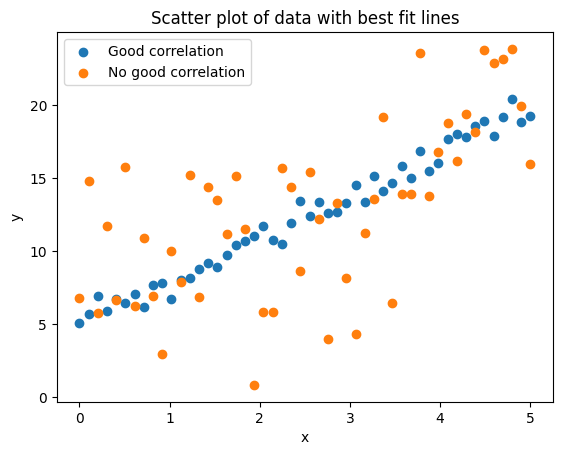

In [67]:
fig, ax = plt.subplots()
ax.scatter(x, y1, label='Good correlation')
ax.scatter(x, y2, label='No good correlation')
ax.legend()
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Scatter plot of data with best fit lines')
plt.show()

We need to use the sm.add_constant utility routine so that the modeling step will include a constant value, and create an OLS model for our first set of data and use the fit method to fit the model. We then print a summary of the data using the summary method:

In [68]:
pred_x = sm.add_constant(x)
model1 = sm.OLS(y1, pred_x).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.979
Method:                 Least Squares   F-statistic:                     2232.
Date:                Thu, 14 Mar 2024   Prob (F-statistic):           6.63e-42
Time:                        14:16:47   Log-Likelihood:                -48.271
No. Observations:                  50   AIC:                             100.5
Df Residuals:                      48   BIC:                             104.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.9966      0.181     27.651      0.0


This is the summary of the results:

Dependent Variable (Dep. Variable): The variable being predicted, denoted as 'y' in this summary.

R-squared: The coefficient of determination, which measures the proportion of the variance in the dependent variable that is predictable from the independent variable(s). In this case, R-squared is 0.979, indicating that approximately 97.9% of the variance in the dependent variable is explained by the independent variable(s).

Model: The type of model used, which is Ordinary Least Squares (OLS) regression.

Method: The method used to fit the model, which is Least Squares.

F-statistic: The F-statistic tests the overall significance of the regression model. It measures whether at least one independent variable has a non-zero coefficient. Here, the F-statistic is 2232 with a very low p-value, indicating that the overall model is statistically significant.

Prob (F-statistic): The p-value associated with the F-statistic. A low p-value (< 0.05) suggests that the regression model is statistically significant.

Coefficients: These are the estimated coefficients for the intercept (const) and the independent variable (x1). The coefficient for 'const' is approximately 4.9966, and the coefficient for 'x1' is approximately 2.9426. These coefficients represent the estimated effect of 'x1' on 'y' when other variables are held constant.

std err: The standard error of the coefficient estimate. It measures the variability of the coefficient estimate. Lower values indicate more precise estimates.

t-statistic: The t-statistic tests the null hypothesis that the coefficient is equal to zero (no effect). A higher absolute value of the t-statistic indicates a more statistically significant coefficient.

P>|t|: The p-value associated with the t-statistic. A low p-value (< 0.05) suggests that the corresponding independent variable is statistically significant.

[0.025, 0.975]: The 95% confidence interval for the coefficient estimate. It provides a range of plausible values for the true population coefficient.

Omnibus, Prob(Omnibus), Skew, Kurtosis: These statistics are related to the normality of residuals. They provide information about the distribution of residuals from the regression model.

Durbin-Watson: This statistic tests for autocorrelation of residuals. Values around 2 suggest no autocorrelation.

Jarque-Bera (JB): This tests the assumption of normality of residuals. A low p-value indicates that the residuals are not normally distributed.

Cond. No.: This measures multicollinearity. Values above 30 suggest multicollinearity might be present.

We repeat the model fitting for the second set of data and print the summary:

In [69]:
model2 = sm.OLS(y2, pred_x).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.390
Model:                            OLS   Adj. R-squared:                  0.377
Method:                 Least Squares   F-statistic:                     30.64
Date:                Thu, 14 Mar 2024   Prob (F-statistic):           1.27e-06
Time:                        14:16:47   Log-Likelihood:                -146.79
No. Observations:                  50   AIC:                             297.6
Df Residuals:                      48   BIC:                             301.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.5562      1.296      5.058      0.0

Now, we create a new range of X values using linspace that we can use to plot the trend lines on our scatter plot. We need to add the constant column to interact with the models that we have created:

In [70]:
model_x = sm.add_constant(np.linspace(0, 5))

Next, we use the predict method on the model objects so that we can use the model to predict the response value at each of the X values we generated in the previous step:

In [71]:
model_y1 = model1.predict(model_x)
model_y2 = model2.predict(model_x)

Finally, we plot the model data computed in the previous two steps on top of the scatter plot:

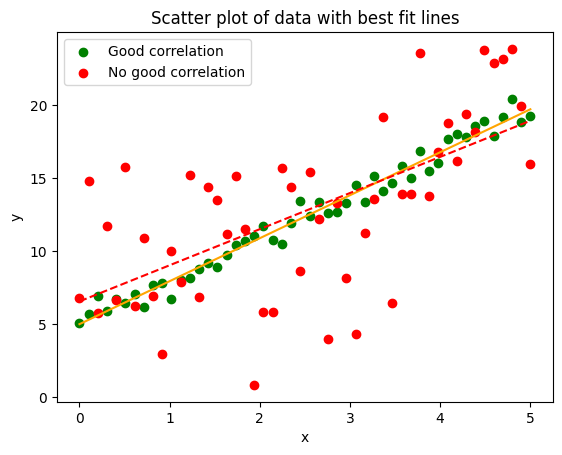

In [83]:
fig, ax = plt.subplots()
ax.scatter(x, y1, label='Good correlation', color = 'g')
ax.scatter(x, y2, label='No good correlation', color='r')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Scatter plot of data with best fit lines')
ax.plot(model_x[:, 1], model_y1, 'orange')
ax.plot(model_x[:, 1], model_y2, 'r--')
ax.legend()
plt.show()

# **Multilinear Regression**

In [84]:
from numpy.random import default_rng
rng = default_rng(12345)

In [85]:
p_vars = pd.DataFrame({
    "const": np.ones((100,)),
    "X1": rng.uniform(0, 15, size=100),
    "X2": rng.uniform(0, 25, size=100),
    "X3": rng.uniform(5, 25, size=100)
})

In [86]:
residuals = rng.normal(0.0, 12.0, size=100)
Y = -10.0 + 5.0*p_vars["X1"] - 2.0*p_vars["X2"] + residuals

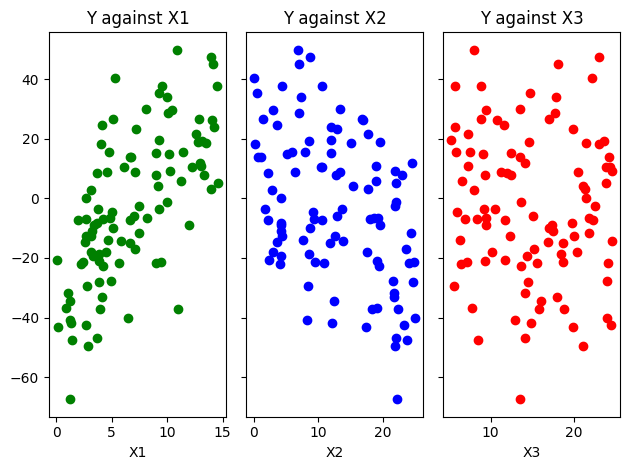

In [92]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, tight_layout=True)
ax1.scatter(p_vars["X1"], Y, c='g')
ax2.scatter(p_vars["X2"], Y, c='b')
ax3.scatter(p_vars["X3"], Y, c='r')
ax1.set_title("Y against X1")
ax1.set_xlabel("X1")
ax2.set_title("Y against X2")
ax2.set_xlabel("X2")
ax3.set_title("Y against X3")
ax3.set_xlabel("X3")
plt.show()

In [93]:
model = sm.OLS(Y, p_vars).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.770
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     106.8
Date:                Thu, 14 Mar 2024   Prob (F-statistic):           1.77e-30
Time:                        14:35:33   Log-Likelihood:                -389.38
No. Observations:                 100   AIC:                             786.8
Df Residuals:                      96   BIC:                             797.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -9.8676      4.028     -2.450      0.0

In [95]:
second_model = sm.OLS(Y, p_vars.loc[:, "const":"X2"]).fit()
print(second_model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     161.5
Date:                Thu, 14 Mar 2024   Prob (F-statistic):           1.35e-31
Time:                        14:36:52   Log-Likelihood:                -389.48
No. Observations:                 100   AIC:                             785.0
Df Residuals:                      97   BIC:                             792.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -11.1058      2.878     -3.859      0.0

# **Classifying using logarithmic regression**

In [96]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy.random import default_rng
rng = default_rng(12345)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_curve

In [97]:
df = pd.DataFrame({
    "var1": np.concatenate([rng.normal(3.0, 1.5, size=50), rng.normal(-4.0, 2.0, size=50)]),
    "var2": rng.uniform(size=100),
    "var3": np.concatenate([rng.normal(-2.0, 2.0, size=50), rng.normal(1.5, 0.8, size=50)])
})

In [104]:
score = 4.0 + df["var1"] + df["var2"] - df["var3"]
Y = score >= 0

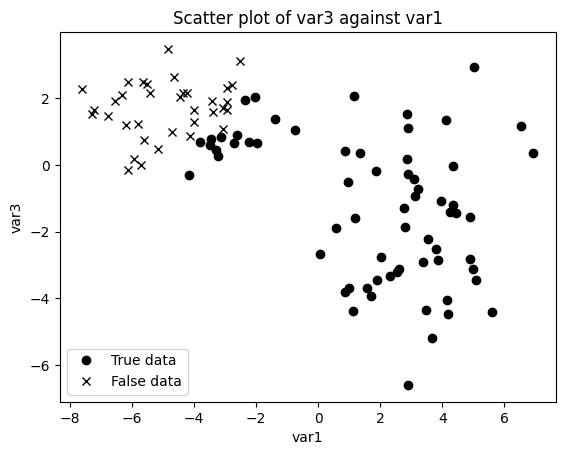

In [105]:
fig1, ax1 = plt.subplots()
ax1.plot(df.loc[Y, "var1"], df.loc[Y, "var3"], "ko", label="True data")
ax1.plot(df.loc[~Y, "var1"], df.loc[~Y, "var3"], "kx", label="False data")
ax1.legend()
ax1.set_xlabel("var1")
ax1.set_ylabel("var3")
ax1.set_title("Scatter plot of var3 against var1")

plt.show()

In [102]:
score = 4.0 + df["var1"] - df["var3"]
Y = score >= 0

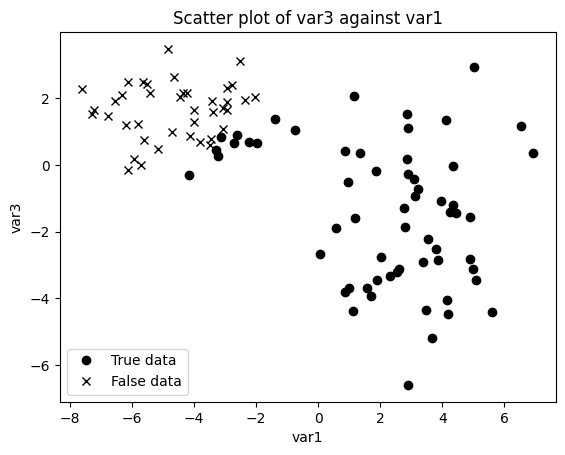

In [103]:
fig1, ax1 = plt.subplots()
ax1.plot(df.loc[Y, "var1"], df.loc[Y, "var3"], "ko", label="True data")
ax1.plot(df.loc[~Y, "var1"], df.loc[~Y, "var3"], "kx", label="False data")
ax1.legend()
ax1.set_xlabel("var1")
ax1.set_ylabel("var3")
ax1.set_title("Scatter plot of var3 against var1")

plt.show()

**Logistic Regression Model**

In [106]:
model = LogisticRegression()
model.fit(df, Y)

LogisticRegression()

In [107]:
test_df = pd.DataFrame({
    "var1": np.concatenate([rng.normal(3.0, 1.5, size=50), rng.normal(-4.0, 2.0, size=50)]),
    "var2": rng.uniform(size=100),
    "var3": np.concatenate([rng.normal(-2.0, 2.0, size=50), rng.normal(1.5, 0.8, size=50)])})

In [109]:
test_scores = 4.0 + test_df["var1"] - test_df["var3"]
test_Y = test_scores >= 0

In [112]:
test_predicts = model.predict(test_df)
plt.show()
print(classification_report(test_Y, test_predicts))

              precision    recall  f1-score   support

       False       1.00      0.92      0.96        39
        True       0.95      1.00      0.98        61

    accuracy                           0.97       100
   macro avg       0.98      0.96      0.97       100
weighted avg       0.97      0.97      0.97       100



**Precision**: Precision is the ratio of true positive predictions to the total number of positive predictions. A high precision indicates that when the model predicts the positive class, it is usually correct. In this case, the precision for the "False" class is 1.00, and for the "True" class is 0.95.

**Recall** (also known as sensitivity or true positive rate): Recall is the ratio of true positive predictions to the total number of actual positive instances. It measures the model's ability to correctly identify all positive instances. A high recall indicates that the model is good at finding positive instances. In this case, the recall for the "False" class is 0.92, and for the "True" class is 1.00.

**F1-score**: The F1-score is the harmonic mean of precision and recall. It provides a balance between precision and recall. It is useful when the classes are imbalanced. The F1-score ranges from 0 to 1, where a higher value indicates better performance. In this case, the F1-score for the "False" class is 0.96, and for the "True" class is 0.98.

**Support**: Support is the number of actual occurrences of the class in the specified dataset. It's the number of samples in each class.

**Accuracy**: Accuracy is the ratio of correct predictions to the total number of predictions. It measures the overall correctness of the model. In this case, the accuracy is 0.97, indicating that the model is correct in its predictions for 97% of the instances.

**Macro average**: Macro average calculates the metric independently for each class and then takes the average. It treats all classes equally, regardless of their support.

**Weighted average**: Weighted average calculates the metric for each class and then takes the weighted average based on the number of true instances for each class. It gives more weight to the classes with more instances.

Overall, the model seems to perform well with high precision, recall, and F1-score for both classes, as well as a high overall accuracy of 97%.